<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_2_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.2'

In [5]:
os.listdir(base_path)

['data_add_delta_1.2_n20.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.149530,34.272004,70.486930,-46.836173,148.072291,176.661588,-28.589297
1,0.0,1.0,39.235718,73.367086,79.996998,111.406775,314.006578,192.879569,121.127008
2,0.0,2.0,85.597094,46.538451,28.149531,18.824759,189.109835,176.647753,12.462081
3,0.0,3.0,32.656954,44.945753,45.126838,-2.367545,130.362000,116.249312,14.112688
4,0.0,4.0,80.326014,47.937472,82.904339,163.690949,384.858773,206.872411,177.986362
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,64.905407,78.204003,82.283677,17.564399,252.957485,203.508391,49.449094
249996,999.0,246.0,50.859911,71.255661,84.945717,195.730962,412.792250,181.669623,231.122627
249997,999.0,247.0,92.549493,42.030128,40.740624,49.077066,234.397311,201.335312,33.061999
249998,999.0,248.0,70.562321,30.917176,78.862313,-19.264337,171.077473,185.375297,-14.297824


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.149530,34.272004,70.486930,-46.836173,148.072291,176.661588,-28.589297
1,0.0,1.0,39.235718,73.367086,79.996998,111.406775,314.006578,192.879569,121.127008
2,0.0,2.0,85.597094,46.538451,28.149531,18.824759,189.109835,176.647753,12.462081
3,0.0,3.0,32.656954,44.945753,45.126838,-2.367545,130.362000,116.249312,14.112688
4,0.0,4.0,80.326014,47.937472,82.904339,163.690949,384.858773,206.872411,177.986362
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,64.905407,78.204003,82.283677,17.564399,252.957485,203.508391,49.449094
249996,999.0,246.0,50.859911,71.255661,84.945717,195.730962,412.792250,181.669623,231.122627
249997,999.0,247.0,92.549493,42.030128,40.740624,49.077066,234.397311,201.335312,33.061999
249998,999.0,248.0,70.562321,30.917176,78.862313,-19.264337,171.077473,185.375297,-14.297824


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    80.149530  34.272004  ...  176.661588  -28.589297
      1.0    39.235718  73.367086  ...  192.879569  121.127008
      2.0    85.597094  46.538451  ...  176.647753   12.462081
      3.0    32.656954  44.945753  ...  116.249312   14.112688
      4.0    80.326014  47.937472  ...  206.872411  177.986362
...                ...        ...  ...         ...         ...
999.0 245.0  64.905407  78.204003  ...  203.508391   49.449094
      246.0  50.859911  71.255661  ...  181.669623  231.122627
      247.0  92.549493  42.030128  ...  201.335312   33.061999
      248.0  70.562321  30.917176  ...  185.375297  -14.297824
      249.0  41.647353  79.759704  ...  176.904899   40.381150

[250000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    80.149530  34.272004  ...  176.661588  -28.589297
      1.0    39.235718  73.367086  ...  192.879569  121.127008
      2.0    85.597094  46.538451  ...  176.647753   12.462081
      3.0    32.656954  44.945753  ...  116.249312   14.112688
      4.0    80.326014  47.937472  ...  206.872411  177.986362
...                ...        ...  ...         ...         ...
999.0 245.0  64.905407  78.204003  ...  203.508391   49.449094
      246.0  50.859911  71.255661  ...  181.669623  231.122627
      247.0  92.549493  42.030128  ...  201.335312   33.061999
      248.0  70.562321  30.917176  ...  185.375297  -14.297824
      249.0  41.647353  79.759704  ...  176.904899   40.381150

[250000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.149530,34.272004,70.486930,-46.836173,148.072291,176.661588,-28.589297
1,0.0,1.0,39.235718,73.367086,79.996998,111.406775,314.006578,192.879569,121.127008
2,0.0,2.0,85.597094,46.538451,28.149531,18.824759,189.109835,176.647753,12.462081
3,0.0,3.0,32.656954,44.945753,45.126838,-2.367545,130.362000,116.249312,14.112688
4,0.0,4.0,80.326014,47.937472,82.904339,163.690949,384.858773,206.872411,177.986362
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,64.905407,78.204003,82.283677,17.564399,252.957485,203.508391,49.449094
249996,999.0,246.0,50.859911,71.255661,84.945717,195.730962,412.792250,181.669623,231.122627
249997,999.0,247.0,92.549493,42.030128,40.740624,49.077066,234.397311,201.335312,33.061999
249998,999.0,248.0,70.562321,30.917176,78.862313,-19.264337,171.077473,185.375297,-14.297824


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    80.149530  34.272004  ...  176.661588  -28.589297
      1.0    39.235718  73.367086  ...  192.879569  121.127008
      2.0    85.597094  46.538451  ...  176.647753   12.462081
      3.0    32.656954  44.945753  ...  116.249312   14.112688
      4.0    80.326014  47.937472  ...  206.872411  177.986362
...                ...        ...  ...         ...         ...
999.0 245.0  64.905407  78.204003  ...  203.508391   49.449094
      246.0  50.859911  71.255661  ...  181.669623  231.122627
      247.0  92.549493  42.030128  ...  201.335312   33.061999
      248.0  70.562321  30.917176  ...  185.375297  -14.297824
      249.0  41.647353  79.759704  ...  176.904899   40.381150

[250000 rows x 7 columns]

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

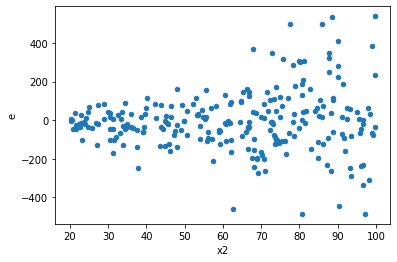

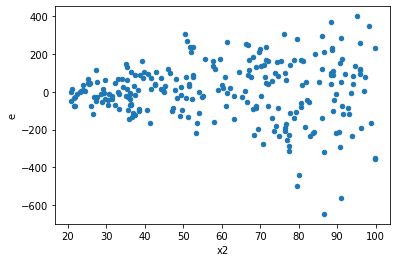

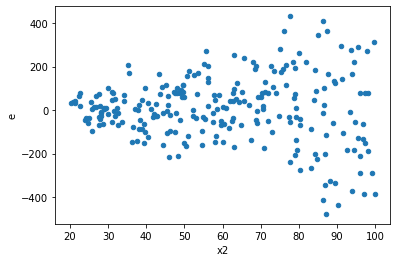

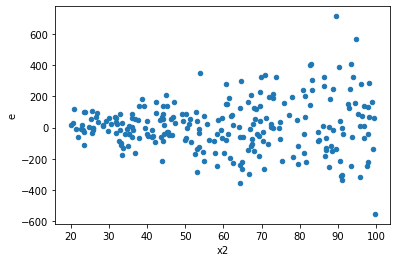

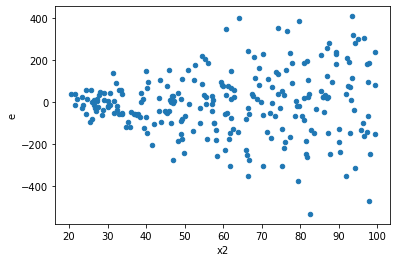

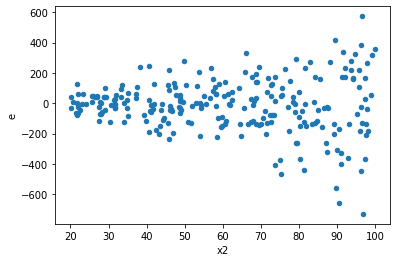

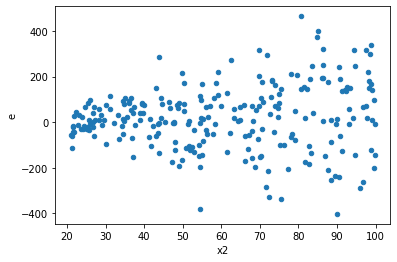

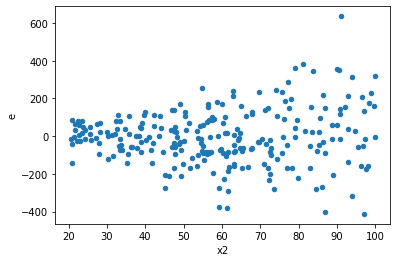

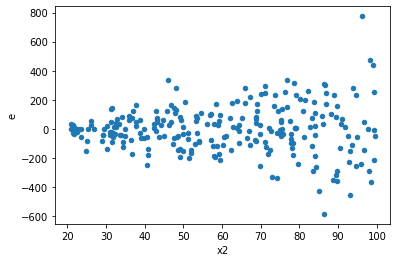

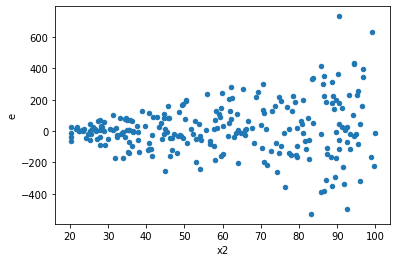

In [14]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,4184943.733965715,498533.6348923163,43593.163895476195,5193.058696794961,8.394506290171709,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,4293940.103227281,654161.1792969656,44728.54274195084,6814.178951010058,6.56403993254694,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,3783302.65618955,629367.521939767,39409.402668641145,6555.911686872572,6.011277233577406,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,4356963.106016523,643798.2444375887,45385.032354338786,6706.231712891549,6.767590846450184,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,3705824.040692605,710659.6104286788,38602.333757214634,7402.704275298737,5.214625942309012,1.2434497875801753e-14,0.9999999999999938,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,5834680.509816899,853547.9187438001,60777.921977259364,8891.124153581251,6.835797243116739,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,3363880.199991663,604464.3470511982,35040.41874991316,6296.503615116649,5.565059736611301,1.3322676295501878e-15,0.9999999999999993,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,3246684.815441283,736669.9766165797,33819.63349418003,7673.645589756038,4.407244652962299,2.7855495687845178e-12,0.9999999999986072,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,4860448.509081167,911411.0778219803,50629.67196959549,9493.865393978962,5.332882853142723,5.773159728050814e-15,0.9999999999999971,Reject005=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,4184943.733965715,498533.6348923163,43593.163895476195,5193.058696794961,8.394506290171709,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,4293940.103227281,654161.1792969656,44728.54274195084,6814.178951010058,6.56403993254694,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,3783302.65618955,629367.521939767,39409.402668641145,6555.911686872572,6.011277233577406,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,4356963.106016523,643798.2444375887,45385.032354338786,6706.231712891549,6.767590846450184,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,3705824.040692605,710659.6104286788,38602.333757214634,7402.704275298737,5.214625942309012,1.2434497875801753e-14,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,5834680.509816899,853547.9187438001,60777.921977259364,8891.124153581251,6.835797243116739,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,3363880.199991663,604464.3470511982,35040.41874991316,6296.503615116649,5.565059736611301,1.3322676295501878e-15,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,3246684.815441283,736669.9766165797,33819.63349418003,7673.645589756038,4.407244652962299,2.7855495687845178e-12,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,4860448.509081167,911411.0778219803,50629.67196959549,9493.865393978962,5.332882853142723,5.773159728050814e-15,Reject005=0 : Heteroscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64